# Simulating directional stellar arrangements with PhoSim on ComCam and WFS corner sensors 

**Summary**:  we simulate an arrow-like arrangement of stars that allows testing orientation of images as they are simulated with PhoSim, and passed through the ISR. We make the catalogs with `ts_phosim`  `SkySim()`, which uses the `ts_wep/policy/focalplanelayout.txt` to translate from input CCD x,y coordinates to ra,dec. Internally, it uses `lsst.sims.coordUtils.CameraUtils.raDecFromPixelCoords` to do the transformation. 

**Results**: To recover the desired orientation we need to use the transpose and `origin='lower'` setting in matplotlib.pyplot.imshow().

**Data**: For ComCam, the in/out of focus  postISR images are stored in `/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_arrow/singleArrow/input/rerun/run1/postISRCCD/` . Raw images are in `singleArrow/iter0/img/`. 

For LsstCam (corner WFS) the images are in `/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_wfs/arrowStars/` and `input/rerun/run1/postISRCCD/` or `singleArrow/iter0/img/` for postISR /raw, respectively. 

## Common information

In [ ]:
import os
import numpy as np 
import matplotlib.pyplot as plt
from astropy.table import Table
%matplotlib inline


from lsst.ts.phosim.SkySim import SkySim

# Survey information
mjd = 57648  # arbitrary observation date 
raInDeg = 0 # boresight in degrees 
declInDeg = 0
rotSkyPos = 0 # rotation angle in degrees 
starMag = 15 # star magnitude 

### Unnecessary elements :

In [ ]:
# from lsst.ts.phosim.Utility import getConfigDir, getPhoSimPath, \
#     getAoclcOutputPath
    
# phosimDir = getPhoSimPath()

# Set the Telescope facade class
# tele = TeleFacade()
# tele.setPhoSimDir(phosimDir)
# tele.setSurveyParam(obsId=obsId, filterType=filterType,
#                     boresight=(ra, decl), rotAngInDeg=rotSkyPos)
# tele.setInstName(CamType.LsstCam)

# Write the accumulated DOF file
#tele.writeAccDofFile(outputDir)

## WFS simulate arrow of stars

[1500 1500 1500 1500] [1900 2200 2500 2800]
[ 400  700 1000 1300] [3000 3000 3000 3000]
y=1.00x 1500.00
[ 200  400  600  800 1000 1200 1400] [1700. 1900. 2100. 2300. 2500. 2700. 2900.]
[1500. 1500. 1500. 1500.  400.  700. 1000. 1300.  200.  400.  600.  800.
 1000. 1200. 1400. 1500.] [1900. 2200. 2500. 2800. 3000. 3000. 3000. 3000. 1700. 1900. 2100. 2300.
 2500. 2700. 2900. 3000.]


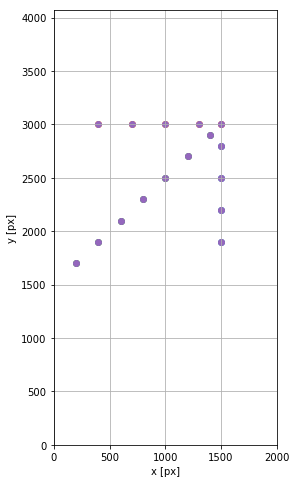

In [23]:
import sys
sys.path.append('/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_tools/')
import analysisTools as at
    
# WFS:  
xPx, yPx = at.pixel_arrow(x_vertex=1500, y_vertex=3000, width=1100, 
                spacing=300, diag_spacing=200, xmin=0, xmax=2000,
                ymin=0, ymax=4072, xy_offset=1300, print_shape=False )



In [24]:
# Make a new instance of SkySim: 
skySim = SkySim()
skySim.setObservationMetaData(raInDeg, declInDeg, rotSkyPos, mjd)

# Add the interested stars
sensorName = ["R44_S00_C0", "R00_S22_C1", "R44_S00_C1", "R00_S22_C0",
              "R04_S20_C1", "R40_S02_C0", "R04_S20_C0", "R40_S02_C1"]
starMag = 15
starId = 0
for sensor in sensorName:
    for ii in range(len(xPx)):
        skySim.addStarByChipPos(sensor, starId, xPx[ii],
                                yPx[ii], starMag)
        starId += 1


In [25]:
# Export sky information
d1 = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/' 
d2 = 'results_wfs'
outputDir = os.path.join(d1,d2)
outputSkyFilePath = os.path.join(outputDir, "skyWfsArrow.txt")
skySim.exportSkyToFile(outputSkyFilePath)


In [26]:
# plot the stars in that file

d1 = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/' 
d2 = 'results_wfs'
outputDir = os.path.join(d1,d2)
outputSkyFilePath = os.path.join(outputDir, "skyWfsArrow.txt")
stars = Table.read(outputSkyFilePath, format='ascii')


(1, 1.4)

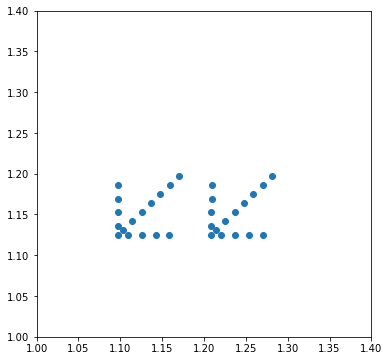

In [27]:
%matplotlib inline

m = stars['Ra']>180
stars['Ra'][m]  = stars['Ra'][m]-360
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(stars['Ra'],stars['Decl'])
ax.set_xlim(1,1.4)
ax.set_ylim(1,1.4)

## ComCam arrow 

[3500 3500 3500 3500 3500] [2000 2300 2600 2900 3200]
[2000 2300 2600 2900 3200] [3500 3500 3500 3500 3500]
y=1.00x 0.00
[1000 1200 1400 1600 1800 2000 2200 2400 2600 2800 3000 3200 3400] [1000. 1200. 1400. 1600. 1800. 2000. 2200. 2400. 2600. 2800. 3000. 3200.
 3400.]
[3500. 3500. 3500. 3500. 3500. 2000. 2300. 2600. 2900. 3200. 1000. 1200.
 1400. 1600. 1800. 2000. 2200. 2400. 2600. 2800. 3000. 3200. 3400. 3500.] [2000. 2300. 2600. 2900. 3200. 3500. 3500. 3500. 3500. 3500. 1000. 1200.
 1400. 1600. 1800. 2000. 2200. 2400. 2600. 2800. 3000. 3200. 3400. 3500.]


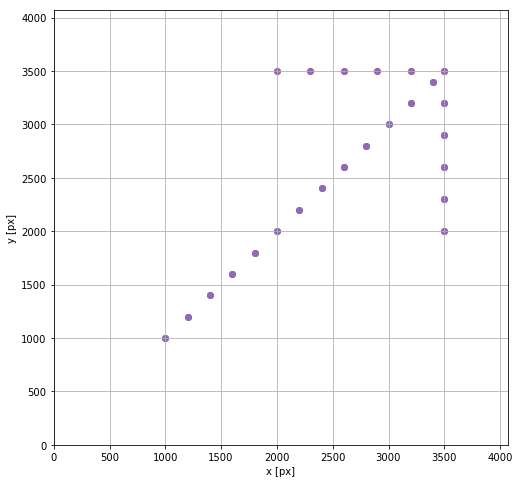

In [28]:
xPx, yPx = at.pixel_arrow(x_vertex=3500, y_vertex=3500, width=1500, 
                spacing=300, diag_spacing=200, xmin=0, xmax=4072,
                ymin=0, ymax=4072, xy_offset=2500  )

In [29]:
# Make a clean instance of SkySim,
# with the same settings as above ... 

skySim = SkySim()
skySim.setObservationMetaData(raInDeg, declInDeg, rotSkyPos, mjd)


# Add the interested stars
sensorName = ["R22_S00", "R22_S01", "R22_S02", 
              "R22_S10", "R22_S11", "R22_S12", 
              "R22_S20", "R22_S21", "R22_S22"]
starMag = 15
starId = 0
for sensor in sensorName:
    for ii in range(len(xPx)):
        skySim.addStarByChipPos(sensor, starId, xPx[ii],
                                yPx[ii], starMag)
        starId += 1


# Export sky information
d1 = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/'
d2 = 'results_arrow'
outputDir = os.path.join(d1,d2)
outputSkyFilePath = os.path.join(outputDir, "skyComCamArrow.txt")
skySim.exportSkyToFile(outputSkyFilePath)
       

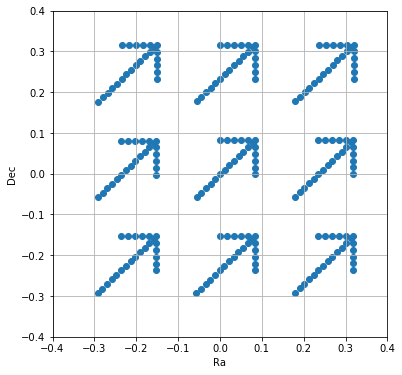

In [30]:
# plot the stars in that file
from astropy.table import Table
import matplotlib.pyplot as plt
%matplotlib inline


import os
d1 = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/'
d2 = 'results_arrow'
outputDir = os.path.join(d1,d2)
outputSkyFilePath = os.path.join(outputDir, "skyComCamArrow.txt")
stars = Table.read(outputSkyFilePath, format='ascii')

%matplotlib inline

m = stars['Ra']>180
stars['Ra'][m]  = stars['Ra'][m]-360
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(stars['Ra'],stars['Decl'])
ax.set_xlim(-0.4,0.4)
ax.set_ylim(-0.4,0.4)
ax.set_xlabel('Ra')
ax.set_ylabel('Dec')
ax.grid()

So that is what we  would expect in the simulation ... 

### This is run with the following:

For R22 (ComCam):
    
    python runComCamStarCatalog.py --skyFile skyComCamArrow.txt --testLabel arrow --expDir singleArrow 

or for corner sensors (LsstCam) :

    python runWfsStar.py 

In [ ]:
Or for testing the rotation angle : 
    
    python runComCamRotAng.py 

In [ ]:
--> once I can run the setup script, with logging , try starting this script ... 

## Show the ComCam RotAng results 

In [7]:
import lsst.daf.persistence as dafPersist
import os 

# Read in the postISR image using the Butler 
dataDir = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/\
analysis_scripts/results_arrow/rotAng-80/'

focalType = 'intra'  # choose whether extra or intra focal image
obsIdDic = {'intra':9006001,  'extra':9006002} 
obsId = obsIdDic[focalType]

detectors = ['S00', 'S01', 'S02','S10', 'S11', 'S12', 'S20', 'S21', 'S22']
raft = 'R22'
print('\nReading data from')
print(dataDir)
repo_dir = os.path.join(dataDir, 'input/rerun/run1')
butler = dafPersist.Butler(repo_dir)

detNumDict = {'S00':90, 'S01':91, 'S02':92, 'S10':93, 'S11':94, 'S12':95, 'S20':96, 'S21':97, 'S22':98}

images = {}
for detector in detectors:
    sensor = raft+'_'+detector 
    print('For sensor %s '%sensor)
    detNum = detNumDict[detector]

    data_id = {'visit': obsId, 'filter': 'g', 'raftName': raft, 'detectorName': detector, 'detector': detNum}
    post = butler.get('postISRCCD', **data_id) 
    image = post.image.array
    images[detector] = image

print('Done')



    


Reading data from
/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_arrow/rotAng-80/
For sensor R22_S00 
For sensor R22_S01 
For sensor R22_S02 
For sensor R22_S10 
For sensor R22_S11 
For sensor R22_S12 
For sensor R22_S20 
For sensor R22_S21 
For sensor R22_S22 
Done


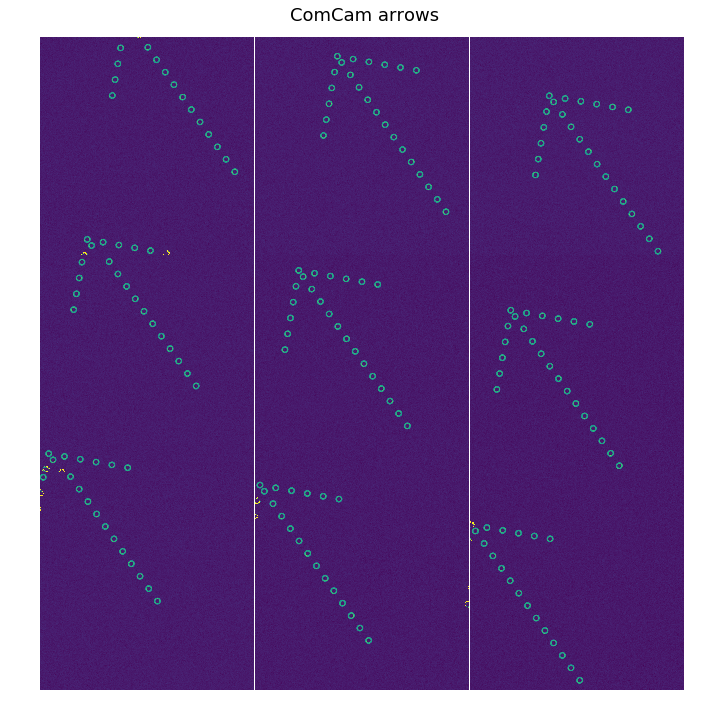

In [10]:
import matplotlib.pyplot as plt 
import numpy as np 

%matplotlib inline

fig,axs = plt.subplots(3,3,figsize=(12,12),frameon=False)
ax = np.ravel(axs)
detectors = list(images.keys())
right_detector_order =['S02', 'S12', 'S22', 
                       'S01', 'S11', 'S21',
                       'S00', 'S10', 'S20']

for i in range(len(ax)):
    detector = right_detector_order[i]
    ax[i].imshow(images[detector].T, vmax=500, origin='lower')
    #ax[i].tick_params(axis='x',  which='both', bottom='off',  top='off', labelbottom='off')  
    #ax[i].xaxis.set_visible(False)
    #ax[i].yaxis.set_visible(False)
    ax[i].grid()
    ax[i].axis('off')
    
fig.subplots_adjust(hspace=0,wspace=-0.1)
fig.text(0.43,0.9,'ComCam arrows', fontsize=18)
plt.savefig('/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_notebooks/comcam_arrows.png',
            bbox_inches='tight')

# Show the WFS result:

In [2]:
import lsst.daf.persistence as dafPersist
import os 
import matplotlib.pyplot as plt 
# Read in the postISR image using the Butler 
dataDir = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/\
analysis_scripts/results_wfs/arrowStars/'

print('\nReading data from')
print(dataDir)
#print('For sensor %s '%sensor)
repo_dir = os.path.join(dataDir, 'input/rerun/run1')
butler = dafPersist.Butler(repo_dir)

data_id = {'expId': expId , 'filter':'g', 'raftName':'R00',  'detectorName': 'S22', 'detector': 197}
post = butler.get('postISRCCD', **data_id) 
image = post.image.array


print('Done')


Reading data from
/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_wfs/arrowStars/
Done


In [7]:
data_id = {'expId': 9006001 , 'filter':'g', 'raftName':'R00',  'detectorName': 'S22', 'detector': 197}
post = butler.get('postISRCCD', **data_id) 
image = post.image.array


Text(0.5, 1.0, 'image transposed')

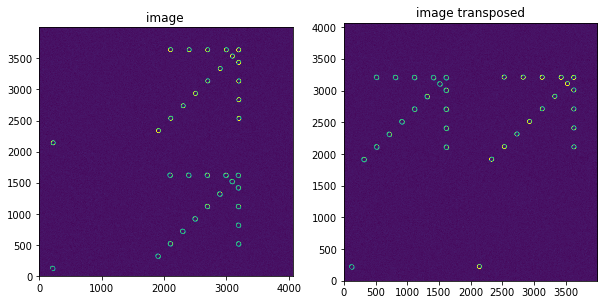

In [9]:
%matplotlib inline
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(image, vmax=800,origin='lower')
ax[0].set_title('image ')
ax[1].imshow(image.T, vmax=800, origin='lower')
ax[1].set_title('image transposed')

Plot with astropy the postISR image : 

In [10]:

from astropy.io import fits
dataDir = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/\
analysis_scripts/results_wfs/arrowStars/input/rerun/run1/postISRCCD/0000009006001-g/\
R00/'
fname= os.listdir(dataDir)[0]
fpath = os.path.join(dataDir,fname)
hdulist  = fits.open(fpath)


In [11]:
hdulist.info() # Header-Data Unit

Filename: /epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_wfs/arrowStars/input/rerun/run1/postISRCCD/0000009006001-g/R00/postISRCCD_0000009006001-g-R00-S22-det197.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      80   ()      
  1                1 CompImageHDU     34   (4072, 4000)   float32   
  2                1 CompImageHDU     43   (4072, 4000)   int32   
  3                1 CompImageHDU     34   (4072, 4000)   float32   
  4                1 BinTableHDU     40   409R x 7C   [1J, 1J, 1J, 1J, 1J, 64A, 64A]   
  5                1 BinTableHDU     35   1R x 5C   [1X, 1D, 1D, 1J, 1J]   
  6                1 BinTableHDU     40   1R x 6C   [1J, 1J, 1J, 1J, 1J, 1D]   
  7                1 BinTableHDU    105   1R x 20C   [1QA(7), 1J, 1J, 1QA(17), 1J, 1J, 1J, 1J, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1J, 1QE(256), 1QA(3)]   
  8                1 BinTableHDU     32   403R x 5C   [1QA(10), 1QA(7), 1QA(10

In [12]:
hdu = hdulist[1]

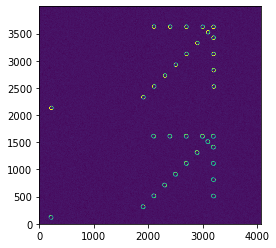

In [14]:
plt.imshow(hdu.data, vmax=800, origin='lower')

Plot with astropy raw image : (after ingest, but before the ISR)  

In [15]:
dataDir = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/\
analysis_scripts/results_wfs/arrowStars/input/raw/9006001/\
R00/'
fname= os.listdir(dataDir)[0]
fpath = os.path.join(dataDir,fname)
hdulist  = fits.open(fpath)

In [16]:
hdulist.info()

Filename: /epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_wfs/arrowStars/input/raw/9006001/R00/0000009006001-R00-S22-det197.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      21   ()      
  1  Segment10     1 ImageHDU       938   (522, 2010)   int32 (rescales to uint32)   
  2  Segment11     1 ImageHDU       938   (522, 2010)   int32 (rescales to uint32)   
  3  Segment12     1 ImageHDU       938   (522, 2010)   int32 (rescales to uint32)   
  4  Segment13     1 ImageHDU       938   (522, 2010)   int32 (rescales to uint32)   
  5  Segment14     1 ImageHDU       938   (522, 2010)   int32 (rescales to uint32)   
  6  Segment15     1 ImageHDU       938   (522, 2010)   int32 (rescales to uint32)   
  7  Segment16     1 ImageHDU       938   (522, 2010)   int32 (rescales to uint32)   
  8  Segment17     1 ImageHDU       938   (522, 2010)   int32 (rescales to uint32)   
  9  Segment07     1 ImageHDU     

In [20]:
hdulist[1].header['AMPID']

'C00'

In [22]:
import numpy as np

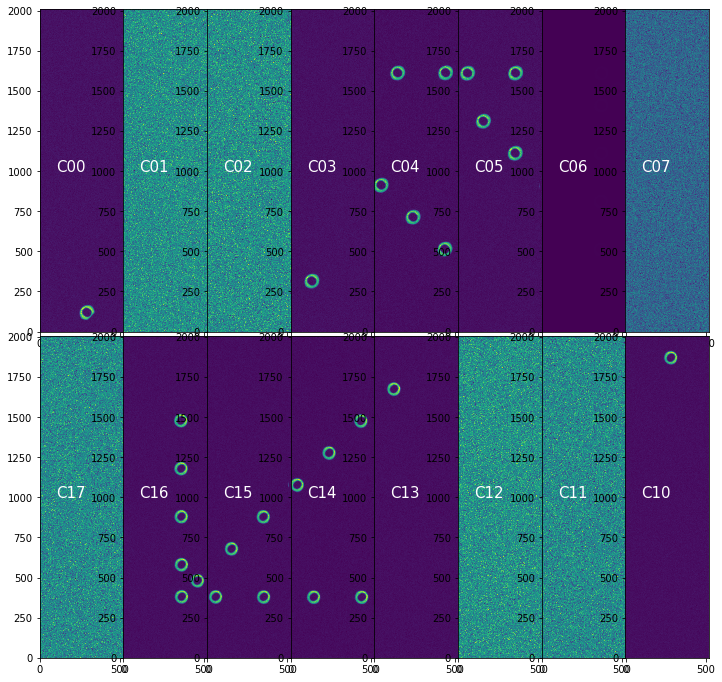

In [29]:
fig,ax  = plt.subplots(2,8, figsize=(12,12))
ax = np.ravel(ax)

for i in range(9,17):
    ax[i-1].imshow(hdulist[i].data, origin='lower')
    ax[i-1].text(100,1000, hdulist[i].header['AMPID'], fontsize=15, color='white')
for i in range(1,9)[::-1]:
    ax[i-1].imshow(hdulist[i].data,  origin='lower')
    ax[i-1].text(100,1000, hdulist[i].header['AMPID'], fontsize=15, color='white')
    
plt.subplots_adjust(hspace=0,wspace=0)


In [31]:
dataDir = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/\
analysis_scripts/results_wfs/arrowStars/iter0/img/extra/'
os.listdir(dataDir)

['starExtraPhoSim.log',
 'lsst_a_9006001_f1_R00_S22_E000.fits',
 'lsst_a_9006001_f1_R04_S20_E000.fits',
 'lsst_a_9006001_f1_R40_S02_E000.fits',
 'lsst_a_9006001_f1_R44_S00_E000.fits',
 'centroid_lsst_e_9006001_f1_R44_S00_C0_E000.txt',
 'centroid_lsst_e_9006001_f1_R00_S22_C1_E000.txt',
 'centroid_lsst_e_9006001_f1_R40_S02_C0_E000.txt',
 'centroid_lsst_e_9006001_f1_R00_S22_C0_E000.txt',
 'centroid_lsst_e_9006001_f1_R44_S00_C1_E000.txt',
 'centroid_lsst_e_9006001_f1_R04_S20_C1_E000.txt',
 'centroid_lsst_e_9006001_f1_R40_S02_C1_E000.txt',
 'centroid_lsst_e_9006001_f1_R04_S20_C0_E000.txt']

In [70]:
# What about the repackaged data but before ingest ?  


dataDir = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/\
analysis_scripts/results_wfs/arrowStars/iter0/img/extra/'
fname= 'lsst_a_9006001_f1_R00_S22_E000.fits'
fpath = os.path.join(dataDir,fname)
hdulist  = fits.open(fpath)


In [37]:
hdulist.info()

Filename: /epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_wfs/arrowStars/iter0/img/extra/lsst_a_9006001_f1_R00_S22_E000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      21   ()      
  1  Segment10     1 ImageHDU       938   (522, 2010)   int32 (rescales to uint32)   
  2  Segment11     1 ImageHDU       938   (522, 2010)   int32 (rescales to uint32)   
  3  Segment12     1 ImageHDU       938   (522, 2010)   int32 (rescales to uint32)   
  4  Segment13     1 ImageHDU       938   (522, 2010)   int32 (rescales to uint32)   
  5  Segment14     1 ImageHDU       938   (522, 2010)   int32 (rescales to uint32)   
  6  Segment15     1 ImageHDU       938   (522, 2010)   int32 (rescales to uint32)   
  7  Segment16     1 ImageHDU       938   (522, 2010)   int32 (rescales to uint32)   
  8  Segment17     1 ImageHDU       938   (522, 2010)   int32 (rescales to uint32)   
  9  Segment07     1 ImageHDU       93

In [71]:
amps = [hdulist[i].header['AMPID'] for i in range(1,17)]
amps

['C00',
 'C01',
 'C02',
 'C03',
 'C04',
 'C05',
 'C06',
 'C07',
 'C17',
 'C16',
 'C15',
 'C14',
 'C13',
 'C12',
 'C11',
 'C10']

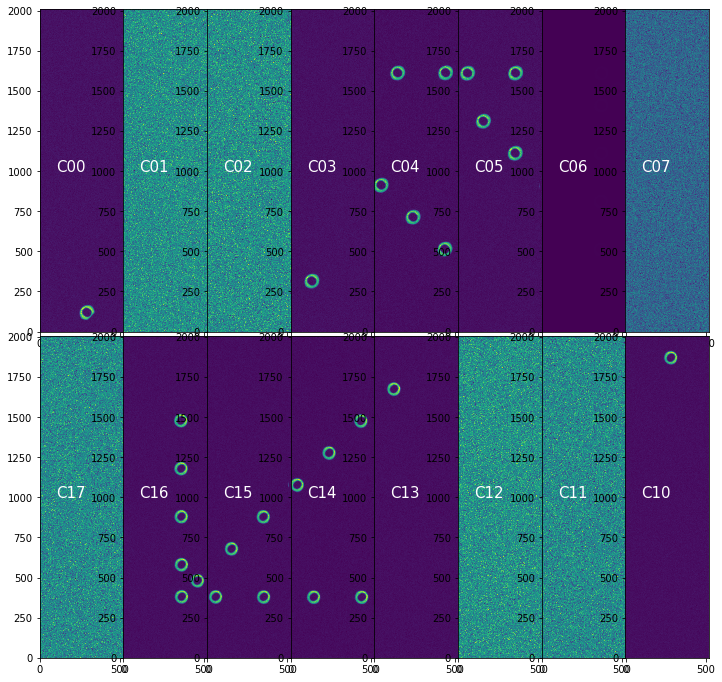

In [41]:
fig,ax  = plt.subplots(2,8, figsize=(12,12))
ax = np.ravel(ax)

for i in range(9,17):
    ax[i-1].imshow(hdulist[i].data, origin='lower')
    ax[i-1].text(100,1000, hdulist[i].header['AMPID'], fontsize=15, color='white')
for i in range(1,9)[::-1]:
    ax[i-1].imshow(hdulist[i].data,  origin='lower')
    ax[i-1].text(100,1000, hdulist[i].header['AMPID'], fontsize=15, color='white')
    
plt.subplots_adjust(hspace=0,wspace=0)


How about the PhoSim file, before repackaging ? 
-- well, normally these get deleted by the repackager 
-- need to keep them for inspection 


In [60]:
dataDir = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/\
analysis_scripts/results_wfs/arrowStars2/iter0/img/orig/'
os.listdir(dataDir)

['starExtraPhoSim.log',
 'lsst_a_9006001_f1_R04_S20_C00_E000.fits.gz',
 'lsst_a_9006001_f1_R04_S20_C01_E000.fits.gz',
 'lsst_a_9006001_f1_R04_S20_C02_E000.fits.gz',
 'lsst_a_9006001_f1_R04_S20_C03_E000.fits.gz',
 'lsst_a_9006001_f1_R04_S20_C04_E000.fits.gz',
 'lsst_a_9006001_f1_R04_S20_C05_E000.fits.gz',
 'lsst_a_9006001_f1_R04_S20_C06_E000.fits.gz',
 'lsst_a_9006001_f1_R04_S20_C07_E000.fits.gz',
 'lsst_e_9006001_f1_R04_S20_C0_E000.fits.gz',
 'lsst_a_9006001_f1_R00_S22_C00_E000.fits.gz',
 'lsst_a_9006001_f1_R00_S22_C01_E000.fits.gz',
 'lsst_a_9006001_f1_R00_S22_C02_E000.fits.gz',
 'lsst_a_9006001_f1_R00_S22_C03_E000.fits.gz',
 'lsst_a_9006001_f1_R00_S22_C04_E000.fits.gz',
 'lsst_a_9006001_f1_R00_S22_C05_E000.fits.gz',
 'lsst_a_9006001_f1_R00_S22_C06_E000.fits.gz',
 'lsst_a_9006001_f1_R00_S22_C07_E000.fits.gz',
 'lsst_e_9006001_f1_R00_S22_C0_E000.fits.gz',
 'lsst_a_9006001_f1_R00_S22_C10_E000.fits.gz',
 'lsst_a_9006001_f1_R00_S22_C11_E000.fits.gz',
 'lsst_a_9006001_f1_R00_S22_C12_E000.f

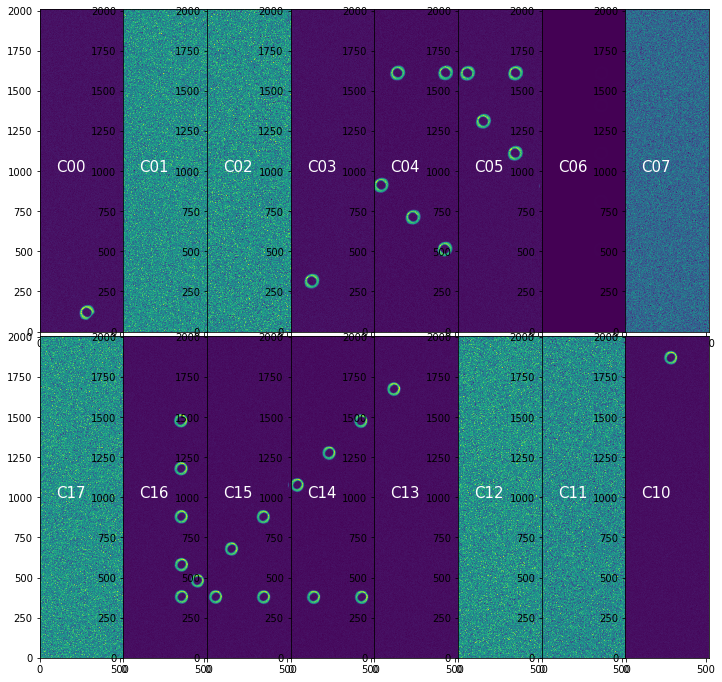

In [73]:
dataDir = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/\
analysis_scripts/results_wfs/arrowStars2/iter0/img/orig/'

fig,ax = plt.subplots(2,8, figsize=(12,12))
ax = np.ravel(ax)

i = 0 
for amp in amps:
    fname = 'lsst_a_9006001_f1_R00_S22_'+amp+'_E000.fits.gz'
    fpath = os.path.join(dataDir,fname)
    hdulist  = fits.open(fpath)
    ax[i].imshow(hdulist[0].data, origin='lower')
    ax[i].text(100,1000, amp, fontsize=15, color='white')
    i += 1 

plt.subplots_adjust(hspace=0,wspace=0)





This actually looks the same as the above  - so there isn't  any difference ...

In [45]:
from lsst.ts.wep.Utility import runProgram

In [54]:
extraFocalDirName = 'extra'

topDir = 'results_wfs'
expDir = 'arrowStars' # name of the experiment dir 

outputDir = os.path.join(topDir,expDir)

iterDefaultDirName = "iter"
iterCount = 0
iterDirName = "%s%d" % (iterDefaultDirName, iterCount)
outputImgDirName = "img"

outputImgDir = os.path.join(outputDir, iterDirName,
                                        outputImgDirName)


phosimImgDir = os.path.join(outputImgDir, extraFocalDirName)
origDirPath = os.path.join(outputImgDir, 'orig')

os.makedirs(origDirPath, exist_ok=True)

argString = '-a %s/. %s/'%(phosimImgDir,origDirPath)
print(argString)
runProgram("cp", argstring=argString)



-a results_wfs/arrowStars/iter0/img/extra/. results_wfs/arrowStars/iter0/img/orig/


In [48]:
! ls ../notebooks/analysis_scripts/ 

In [53]:
os.getcwd()

'/data/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts'

In [52]:
os.chdir('../notebooks/analysis_scripts/')

In [2]:
focalType = 'intra'
expIdDic = {'intra':9006002, 'extra':9006002}
expId = expIdDic[focalType]
data_ids =[{'expId': expId , 'filter':'g', 'raftName':'R00',  'detectorName': 'S22', 'detector': 197},
           {'expId': expId , 'filter':'g', 'raftName':'R04',  'detectorName': 'S20', 'detector': 204},
           {'expId': expId , 'filter':'g', 'raftName':'R40',  'detectorName': 'S02', 'detector': 209},
           {'expId': expId , 'filter':'g', 'raftName':'R44',  'detectorName': 'S00', 'detector': 216}
          ]

# Read each figure as a postage stamp, store data to an array 

data_id = data_ids[0]
sensor = data_id['raftName']+'_'+data_id['detectorName']
print(sensor)
post = butler.get('postISRCCD', **data_id) 

# store in a dictionary
image = post.image.array

R00_S22


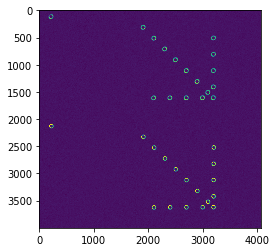

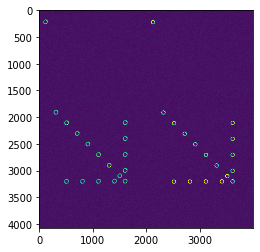

In [11]:
plt.imshow(image.T, vmax=800)

In [111]:
focalType = 'intra'
expIdDic = {'intra':9006002, 'extra':9006002}
expId = expIdDic[focalType]
data_ids =[{'expId': expId , 'filter':'g', 'raftName':'R00',  'detectorName': 'S22', 'detector': 197},
           {'expId': expId , 'filter':'g', 'raftName':'R04',  'detectorName': 'S20', 'detector': 204},
           {'expId': expId , 'filter':'g', 'raftName':'R40',  'detectorName': 'S02', 'detector': 209},
           {'expId': expId , 'filter':'g', 'raftName':'R44',  'detectorName': 'S00', 'detector': 216}
          ]

# Read each figure as a postage stamp, store data to an array 
images = {}

for i in range(len(data_ids)):
    data_id = data_ids[i]
    sensor = data_id['raftName']+'_'+data_id['detectorName']
    print(sensor)
    post = butler.get('postISRCCD', **data_id) 

    # store in a dictionary
    images[sensor] = post.image.array

R00_S22
R04_S20
R40_S02
R44_S00


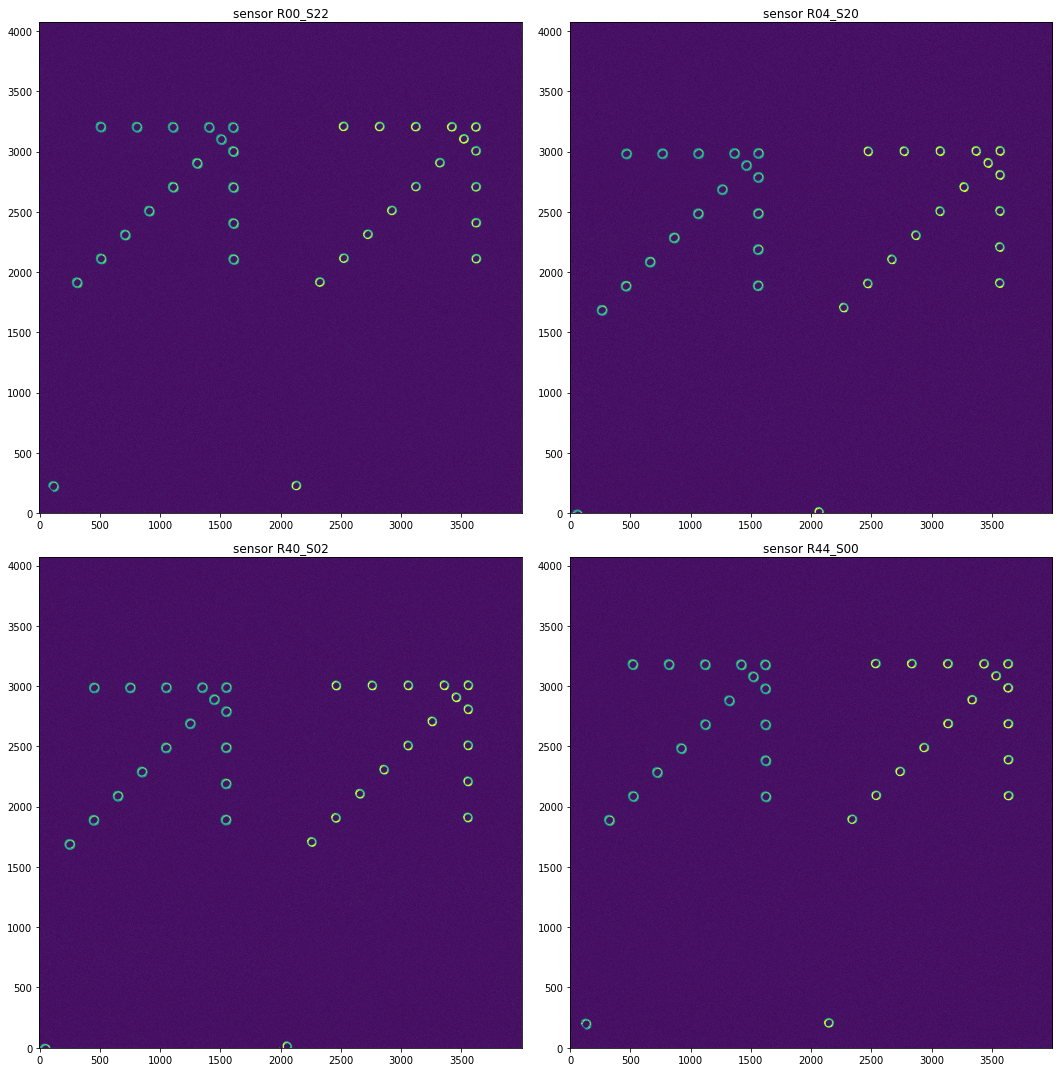

In [118]:
%matplotlib inline
focalType = 'intra'

fig, axs = plt.subplots(2,2,figsize=(15,15))
ax = np.ravel(axs)

i = 0 
for sensor in images.keys():
    img = ax[i].imshow(images[sensor].T, origin='lower', vmax=800)
    ax[i].set_title('sensor %s'%sensor)
    i += 1 

plt.tight_layout()


# Show the ComCam result 

In [97]:
import lsst.daf.persistence as dafPersist
import os 

# Read in the postISR image using the Butler 
dataDir = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/\
analysis_scripts/results_arrow/singleArrow/'

focalType = 'intra'  # choose whether extra or intra focal image
obsIdDic = {'intra':9006001,  'extra':9006002} 
obsId = obsIdDic[focalType]

detectors = ['S00', 'S01', 'S02','S10', 'S11', 'S12', 'S20', 'S21', 'S22']
raft = 'R22'
print('\nReading data from')
print(dataDir)
repo_dir = os.path.join(dataDir, 'input/rerun/run1')
butler = dafPersist.Butler(repo_dir)

detNumDict = {'S00':90, 'S01':91, 'S02':92, 'S10':93, 'S11':94, 'S12':95, 'S20':96, 'S21':97, 'S22':98}

images = {}
for detector in detectors:
    sensor = raft+'_'+detector 
    print('For sensor %s '%sensor)
    detNum = detNumDict[detector]

    data_id = {'visit': obsId, 'filter': 'g', 'raftName': raft, 'detectorName': detector, 'detector': detNum}
    post = butler.get('postISRCCD', **data_id) 
    image = post.image.array
    images[detector] = image

print('Done')



    


Reading data from
/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_arrow/singleArrow/
For sensor R22_S00 
For sensor R22_S01 
For sensor R22_S02 
For sensor R22_S10 
For sensor R22_S11 
For sensor R22_S12 
For sensor R22_S20 
For sensor R22_S21 
For sensor R22_S22 
Done


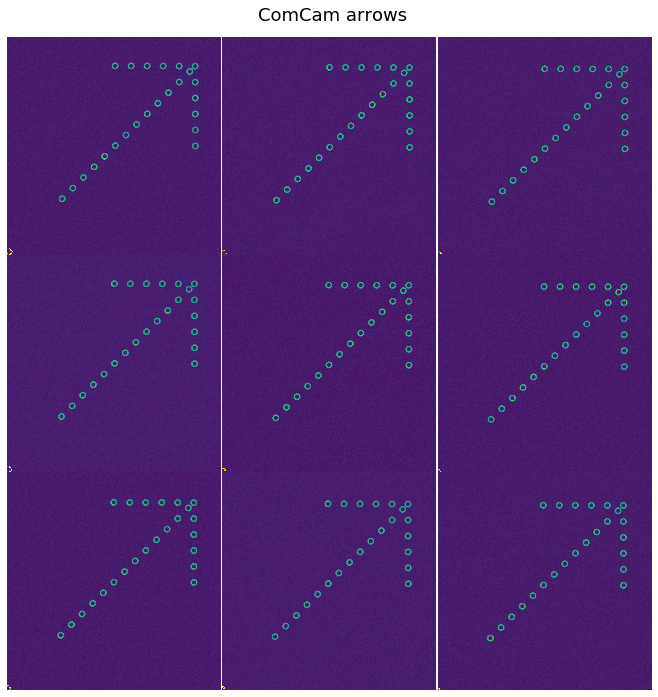

In [108]:
%matplotlib inline

fig,axs = plt.subplots(3,3,figsize=(12,12),frameon=False)
ax = np.ravel(axs)
detectors = list(images.keys())
for i in range(len(ax)):
    ax[i].imshow(images[detectors[i]].T, vmax=500, origin='lower')
    #ax[i].tick_params(axis='x',  which='both', bottom='off',  top='off', labelbottom='off')  
    #ax[i].xaxis.set_visible(False)
    #ax[i].yaxis.set_visible(False)
    ax[i].grid()
    ax[i].axis('off')
    
fig.subplots_adjust(hspace=0,wspace=-0.1)
fig.text(0.43,0.9,'ComCam arrows', fontsize=18)
plt.savefig('/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_notebooks/comcam_arrows.png',
            bbox_inches='tight')